# Assignment09
# Name : Junha Lee
# Student ID : 2017220159
# https://github.com/myosoo/Assignment09

# Import packages 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Load mnist dataset

In [2]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# Normalize the values of the input data to be [0, 1]

In [3]:
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# Example of distance function between two vectors x and y

In [4]:
#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

# Make a matrix each column of which represents an images in a vector form

In [5]:
#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

# Plot first 150 images out of 10,000 with their labels

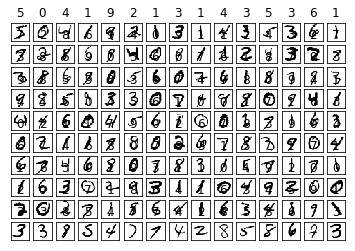

In [6]:
# 
# plot first 150 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(150):

    label       = list_label_train[i]
    im_vector   = list_image_train[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

# Plot the average image of all the images for each digit

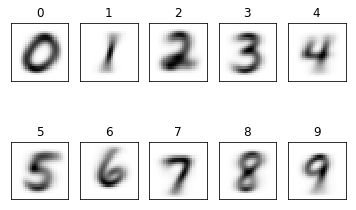

In [7]:
#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_train):

    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# Define random vector $\mathbf{r_i}$

In [8]:
# 784 is dimension of r
# N is arbitrarily designated by us

P = 784

def random_vector(P, N):
    r = np.empty((P, N))
    for i in range(N):
        mu = 0
        sigma = 1
        r[:,i] = np.random.normal(mu, sigma, P)
    return r

# Inner product $\mathbf{r_i}$ and our dataset(feature vector x) : $\mathbf{A} = \mathbf{r_i}^T\cdot\mathbf{x}$

In [9]:
def inner_product(data, r):
    x = np.matmul(np.transpose(data), r)
    return np.transpose(x)

# Define and compute theta : $\Theta = (\mathbf{A}^T\mathbf{A})^\mathbf{-1}\mathbf{A}^T\cdot\mathbf{y}$

In [10]:
def model_parameters(x, label):
    A = np.transpose(x)
    theta = np.linalg.pinv(A).dot(label)
    return theta

# Define y tilde : $\tilde{\mathbf{y}}$

In [11]:
def y_tilde(theta, x):
    return np.matmul(np.transpose(x), theta)

# Define classfier : $\hat{y} = \mathbf{sign}(\tilde{y})$

In [12]:
def y_hat(y_tilde):
    value = np.empty_like(y_tilde)
    for i in range(y_tilde.size):
        if y_tilde[i] >= 0:
            value[i] = 1
        else:
            value[i] = -1
    return value

# Present the evaluation value table (TP, FP, TN, FN)

In [13]:
def evaluation(predicted, label, trainImageData):
    TP_count = 0
    FP_count = 0
    TN_count = 0
    FN_count = 0
    
    TP_average = np.zeros((size_row * size_col), dtype=float)
    FP_average = np.zeros((size_row * size_col), dtype=float)
    TN_average = np.zeros((size_row * size_col), dtype=float)
    FN_average = np.zeros((size_row * size_col), dtype=float)

    for i in range(predicted.size):
        pred = predicted[i]
        ans = label[i]
        data = trainImageData[:,i]
        
        if pred == 1 and ans == 1:
            TP_count += 1
            TP_average += data
        elif pred == 1 and ans == -1:
            FP_count += 1
            FP_average += data
        elif pred == -1 and ans == 1:
            FN_count += 1      
            FN_average += data
        else:
            TN_count += 1
            TN_average += data
            
    TP_average /= TP_count
    FP_average /= FP_count
    TN_average /= TN_count
    FN_average /= FN_count
            
    return ((TP_count, FP_count, TN_count, FN_count), (TP_average, FP_average, TN_average, FN_average))

# Define F1score

In [14]:
def F1score(TP, FP, TN, FN):
    return (2 * TP / (TP + FP) * TP / (TP + FN)) / (TP / (TP + FN) + TP / (TP + FN)) 

In [15]:
def modify_label_to_fit(number, original_label):
    return np.transpose(np.asarray([1 if i == number else -1 for i in original_label]))

train_label_for_zeroDetector = modify_label_to_fit(0, list_label_train)
test_label_for_zeroDetector = modify_label_to_fit(0, list_label_test)

# Definition of plot the average image (28 × 28) of TP, FP, TN, FN

In [16]:
def plotAverageImages(averageImages, N):
    (TP_average, FP_average, TN_average, FN_average) = averageImages
    
    fig = plt.figure()
    fig.suptitle('number of parameter: ' + str(N))
    
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.set_title('TP')
    ax1.imshow(TP_average.reshape((size_row, size_col)), cmap = 'Greys', interpolation = 'None')    
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

    
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.set_title('FP')
    ax2.imshow(FP_average.reshape((size_row, size_col)), cmap = 'Greys', interpolation = 'None')
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
  

    ax3 = fig.add_subplot(2, 2, 3)
    ax3.set_title('TN')
    ax3.imshow(TN_average.reshape((size_row, size_col)), cmap = 'Greys', interpolation = 'None')  
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
    
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.set_title('FN')
    ax4.imshow(FN_average.reshape((size_row, size_col)), cmap = 'Greys', interpolation = 'None')
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    return

# Plotting the image each number of parameter : $\mathbf{N} = (2^0, 2^1, 2^2, 2^3, 2^4, 2^5, 2^6, 2^7, 2^8, 2^9, 2^{10}, 2^{11})$ 

In [17]:
num_N = [2 ** 0 , 2 ** 1, 2 ** 2, 2 ** 3, 2 ** 4, 2 ** 5, 2 ** 6, 2 ** 7, 2 ** 8, 2 ** 9, 2 ** 10, 2 ** 11]

# Compute all F1scores by definitions

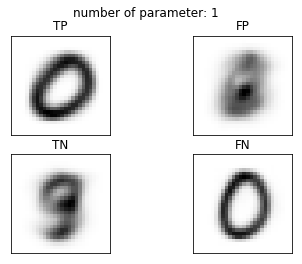

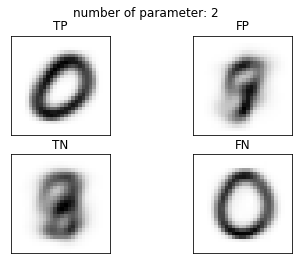

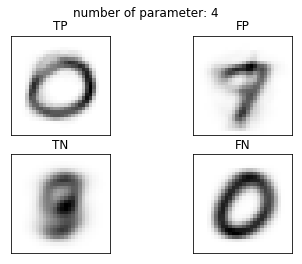

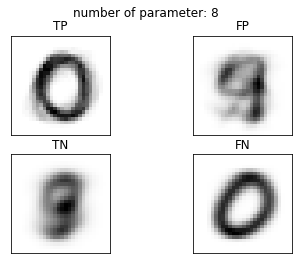

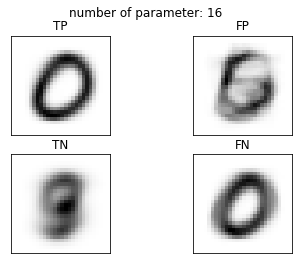

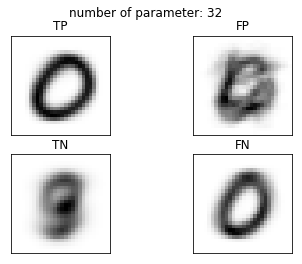

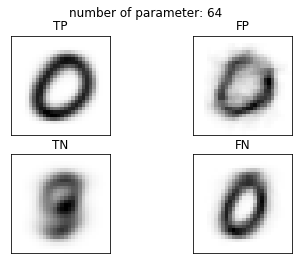

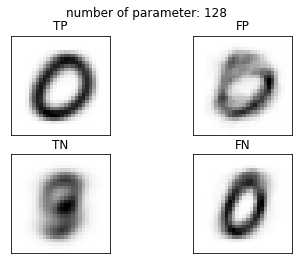

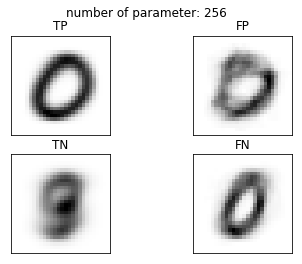

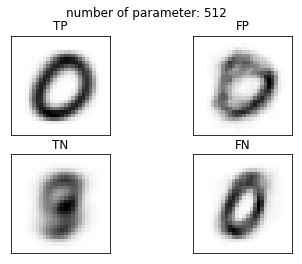

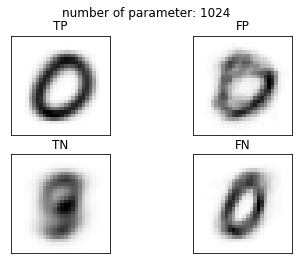

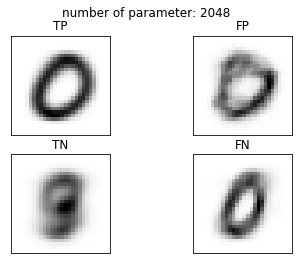

In [18]:
scoreLog = {}
for N in num_N:
    r = random_vector(size_row * size_col, N)
    train_x = inner_product(list_image_train, r)
    theta = model_parameters(train_x, train_label_for_zeroDetector)
    test_x = inner_product(list_image_test, r)
    tilde_value = y_tilde(theta, test_x)
    predicted = y_hat(tilde_value)
    ((TP, FP, TN, FN), averageImages) = evaluation(predicted, test_label_for_zeroDetector, list_image_test)
    score = F1score(TP, FP, TN, FN)
    scoreLog[str(N)] = score
    plotAverageImages(averageImages, N)

# Show best number of parameter

Maximum F1 score : 0.9404517453798767
Best number of parameter : 512


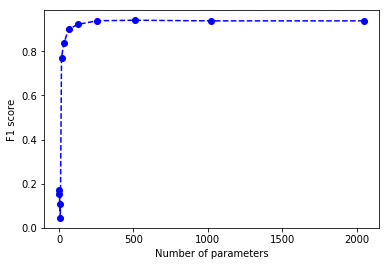

In [19]:
print("Maximum F1 score : " + str(max(scoreLog.values())))
print("Best number of parameter : " + str(max(scoreLog, key = scoreLog.get)))

plt.plot(num_N, scoreLog.values(), color = 'b', marker = 'o', linestyle = '--')
plt.xlabel('Number of parameters')
plt.ylabel('F1 score')
plt.show()